In [1]:
#install.packages('dplyr')

In [141]:
#library('dplyr')
library(ggplot2)

### Note
**Opisując dane staram się wyciągnąć z nich co się tylko da, nie trzeba ich aż tak zgłębiać, rysując np milion wykresów 
potem się to ładnie przebierze i zdecyduje co jest najważniejsze**

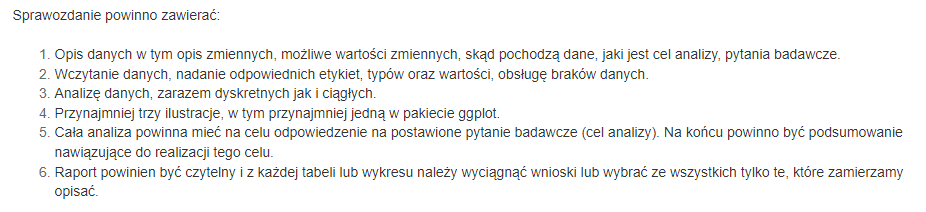

## CEL I PYTANIA CZYLI DOKAD ZMIERZAMY

How did the popularity of eBooks change? - CZAS VS COUNT <br>
num_pages VS count <br>
How are average rating and popularity related? AVG VS COUNT <br>
publisher VS count  ---> <br>
Top 10 publishers and their popularity + top 10 authors czyli publishers vs rating count i avg <br>

**CEL** -  analiza zainteresowań czytleników względem różnych aspektów książek kryminalnych tj. ilości stron, wydawnictwa, autora i czasu XD
Badanie zainteresowania książkami i ich popularnością 



# Wczytanie danych - cały plik i z pominiętymi NAnami

In [26]:
plik <- read.csv('best_crime_and_mystery_books.csv', na.strings=c("", "NA"), header = TRUE)
plik

book_rank,id,title,book_author,publication_year,publisher,language_code,num_pages,average_rating,ratings_count
<int>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<dbl>,<int>
1,2429135,"The Girl with the Dragon Tattoo (Millennium, #1)",Stieg Larsson,2008,Knopf,eng,465,4.13,2323151
2,16299,And Then There Were None,Agatha Christie,2004,St. Martin's Press,eng,264,4.26,642138
3,960,"Angels & Demons (Robert Langdon, #1)",Dan Brown,2006,Pocket Books,eng,736,3.90,2450604
4,17899948,Rebecca,Daphne du Maurier,2013,"Little, Brown and Company",eng,449,4.23,200400
5,168642,In Cold Blood,Truman Capote,1994,Vintage,eng,343,4.07,463437
6,22034,The Godfather,Mario Puzo,2002,NAL,eng,448,4.36,287416
7,12232938,The Lovely Bones,Alice Sebold,2006,"Little, Brown and Company",eng,372,3.81,1875378
8,119073,The Name of the Rose,Umberto Eco,1994,Harvest Books,eng,536,4.12,244807
9,5358,The Firm,Robin Waterfield,2000,Addison Wesley Publishing Company,eng,76,4.02,544744


In [27]:
plik2 <- na.omit(plik)

# OPIS DANYCH I ZMIENNYCH

Zbiór danych przedstawia cechy najlepszych 5281 książek kryminalnych i zagadkowych. ((jak przetłumaczyć crime and mystery to ja nie wiem xd)) <br>
In this dataset you will find the ten feature that describe the best 5281 crime & mystery books<br>
pochodzenie: strona kaggle https://www.kaggle.com/datasets/salmanalmaiman/goodreads-beast-crime-mystery-books

#### book_rank
Miejsce w rankingu książek stworzonym przez stronę goodreads [https://www.goodreads.com/] <br>
zawiera zmienne typu int o wartościach od 1 do 5269, wiele pozycji jest powtórzonych - jedno miejsce zajmuje kilka książek ex aequo, stąd też brak kilku wartości

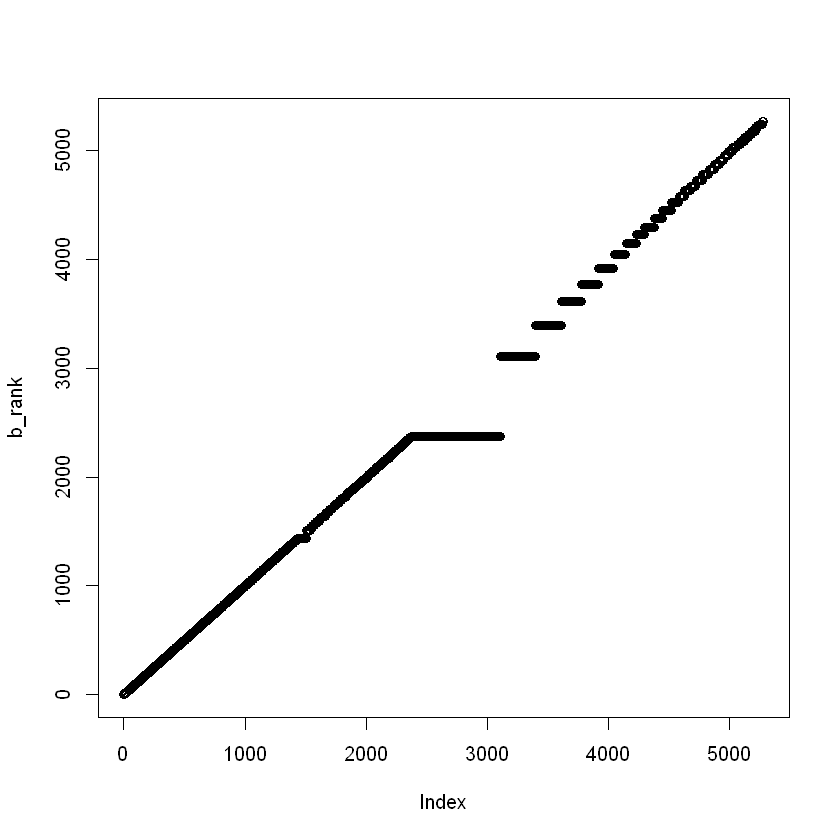

In [35]:
b_rank <- plik$book_rank
#b_rank
plot(b_rank)


### id
unikalny identyfikator danej książki, zmienna typu int, osiąga przeróżne wartości pomiędzy 3 a 52722291


[1] 3

[1] 52969988

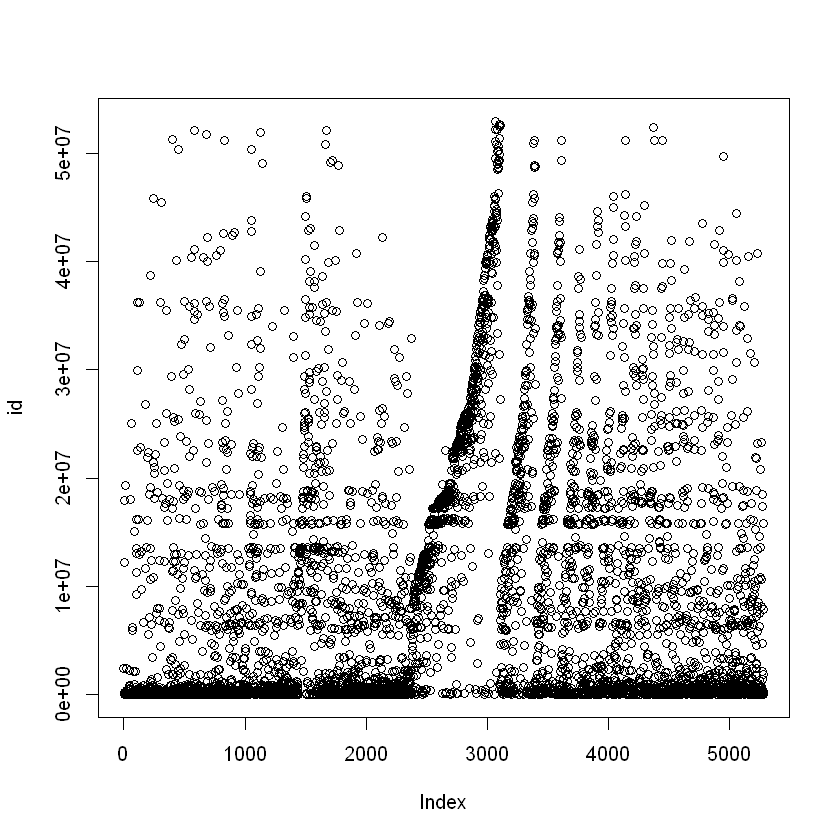

In [36]:
id <- plik$id
#b_rank
plot(id)
min(id)
max(id)

### title
tytuł danej książki, zmienna typu chr, przykładowe 10 tytułów




In [38]:
title <- plik$title
title[1:10]

[1] "The Girl with the Dragon Tattoo (Millennium, #1)"
 [2] "And Then There Were None"                        
 [3] "Angels & Demons (Robert Langdon, #1)"            
 [4] "Rebecca"                                         
 [5] "In Cold Blood"                                   
 [6] "The Godfather"                                   
 [7] "The Lovely Bones"                                
 [8] "The Name of the Rose"                            
 [9] "The Firm"                                        
[10] "Shutter Island"

### book_author
autor danej książki, zmienna typu chr, nie zawiera braku danych <br>
przykładowych 10 autorów o największej liczbie napisanych książek

In [53]:
a <-plik %>% count(book_author, sort = TRUE)
a[1:10,]

,book_author,n
,<chr>,<int>
1,Agatha Christie,93
2,James Patterson,36
3,Arthur Conan Doyle,31
4,Ruth Rendell,29
5,Harlan Coben,26
6,Isaac Asimov,24
7,John Sandford,24
8,Sidney Sheldon,24
9,Georges Simenon,23


In [55]:
sum(a[,1] == 'NA')

[1] 0

### publication_year
rok publikacji książki, typ int,  zawiera wartości pomiedzy 1934 a 2021, w tym az 727 braków danych <br>
problem jest z dwoma wartościami - 6 i 17 - poprawiam je na 2006 i 2017

In [83]:
year2 <- plik$publication_year
year <- na.omit(plik$publication_year)
length(year2) - length(year)

[1] 727

In [109]:
sort(year) ##nie sądze żeby książke wydali w 6 roku wiec zakładam że wydali ją w 2006, podobnie z 17

[1]    6   17 1934 1937 1945 1949 1949 1951 1951 1953 1955 1955 1955 1956
  [15] 1956 1959 1960 1960 1961 1961 1961 1962 1962 1963 1963 1963 1964 1965
  [29] 1965 1965 1966 1967 1967 1968 1968 1968 1968 1969 1969 1970 1971 1971
  [43] 1971 1972 1972 1972 1972 1972 1972 1973 1973 1973 1973 1974 1974 1974
  [57] 1975 1975 1975 1975 1976 1976 1976 1976 1976 1976 1976 1976 1976 1977
  [71] 1977 1977 1977 1977 1977 1977 1978 1978 1978 1978 1978 1978 1978 1979
  [85] 1979 1979 1979 1979 1980 1980 1980 1980 1980 1980 1980 1980 1981 1981
  [99] 1982 1982 1982 1982 1982 1982 1982 1982 1982 1982 1982 1982 1983 1983
 [113] 1983 1983 1983 1983 1983 1983 1983 1983 1983 1984 1984 1984 1984 1984
 [127] 1984 1984 1984 1984 1984 1984 1984 1984 1984 1984 1984 1985 1985 1985
 [141] 1985 1985 1985 1985 1985 1985 1985 1985 1985 1985 1985 1985 1986 1986
 [155] 1986 1986 1986 1986 1986 1986 1986 1986 1986 1986 1986 1986 1986 1986
 [169] 1986 1986 1986 1986 1987 1987 1987 1987 1987 1987 1987 1987 1987 1987
 [183] 1987 1987 1987 1987 1987 1987 1987 1987 1987 1987 1987 1987 1987 1987
 [197] 1987 1988 1988 1988 1988 1988 1988 1988 1988 1988 1988 1988 1988 1988
 [211] 1988 1988 1988 1988 1988 1988 1988 1988 1988 1988 1988 1988 1988 1988
 [225] 1988 1988 1988 1988 1988 1989 1989 1989 1989 1989 1989 1989 1989 1989
 [239] 1989 1989 1989 1989 1989 1989 1989 1989 1989 1989 1989 1989 1989 1989
 [253] 1989 1990 1990 1990 1990 1990 1990 1990 1990 1990 1990 1990 1990 1990
 [267] 1990 1990 1990 1990 1990 1990 1990 1990 1990 1990 1990 1990 1990 1990
 [281] 1990 1990 1990 1990 1990 1990 1990 1990 1991 1991 1991 1991 1991 1991
 [295] 1991 1991 1991 1991 1991 1991 1991 1991 1991 1991 1991 1991 1991 1991
 [309] 1991 1991 1991 1991 1991 1991 1991 1991 1991 1991 1991 1991 1991 1991
 [323] 1991 1992 1992 1992 1992 1992 1992 1992 1992 1992 1992 1992 1992 1992
 [337] 1992 1992 1992 1992 1992 1992 1992 1992 1992 1992 1992 1992 1992 1992
 [351] 1992 1992 1992 1992 1992 1992 1992 1992 1992 1993 1993 1993 1993 1993
 [365] 1993 1993 1993 1993 1993 1993 1993 1993 1993 1993 1993 1993 1993 1993
 [379] 1993 1993 1993 1993 1993 1993 1993 1993 1993 1993 1993 1993 1993 1993
 [393] 1993 1993 1993 1993 1993 1993 1993 1994 1994 1994 1994 1994 1994 1994
 [407] 1994 1994 1994 1994 1994 1994 1994 1994 1994 1994 1994 1994 1994 1994
 [421] 1994 1994 1994 1994 1994 1994 1994 1994 1994 1994 1994 1994 1994 1994
 [435] 1994 1994 1994 1994 1994 1994 1994 1994 1994 1994 1994 1994 1994 1994
 [449] 1994 1994 1995 1995 1995 1995 1995 1995 1995 1995 1995 1995 1995 1995
 [463] 1995 1995 1995 1995 1995 1995 1995 1995 1995 1995 1995 1995 1995 1995
 [477] 1995 1995 1995 1995 1995 1995 1995 1995 1995 1995 1995 1995 1995 1995
 [491] 1995 1995 1995 1995 1995 1995 1995 1995 1995 1995 1995 1995 1995 1995
 [505] 1995 1995 1995 1995 1995 1995 1995 1995 1995 1995 1995 1995 1995 1995
 [519] 1995 1995 1995 1995 1996 1996 1996 1996 1996 1996 1996 1996 1996 1996
 [533] 1996 1996 1996 1996 1996 1996 1996 1996 1996 1996 1996 1996 1996 1996
 [547] 1996 1996 1996 1996 1996 1996 1996 1996 1996 1996 1996 1996 1996 1996
 [561] 1996 1996 1996 1996 1996 1996 1996 1996 1996 1996 1996 1996 1996 1996
 [575] 1996 1996 1996 1996 1996 1996 1996 1996 1996 1997 1997 1997 1997 1997
 [589] 1997 1997 1997 1997 1997 1997 1997 1997 1997 1997 1997 1997 1997 1997
 [603] 1997 1997 1997 1997 1997 1997 1997 1997 1997 1997 1997 1997 1997 1997
 [617] 1997 1997 1997 1997 1997 1997 1997 1997 1997 1997 1997 1997 1997 1997
 [631] 1997 1997 1997 1997 1997 1997 1997 1997 1997 1997 1997 1997 1997 1997
 [645] 1997 1997 1998 1998 1998 1998 1998 1998 1998 1998 1998 1998 1998 1998
 [659] 1998 1998 1998 1998 1998 1998 1998 1998 1998 1998 1998 1998 1998 1998
 [673] 1998 1998 1998 1998 1998 1998 1998 1998 1998 1998 1998 1998 1998 1998
 [687] 1998 1998 1998 1998 1998 1998 1998 1998 1998 1998 1998 1998 1998 1998
 [701] 1998 1998 1998 1998 1998 1998 1998 1998 1998 1998 1998 1998 1998 1998
 [715] 1998 1998 1998 1998 1998 1998 1998 1998 1998 1998 1999 1999 1999 1999

[1] 1934

[1] 2021

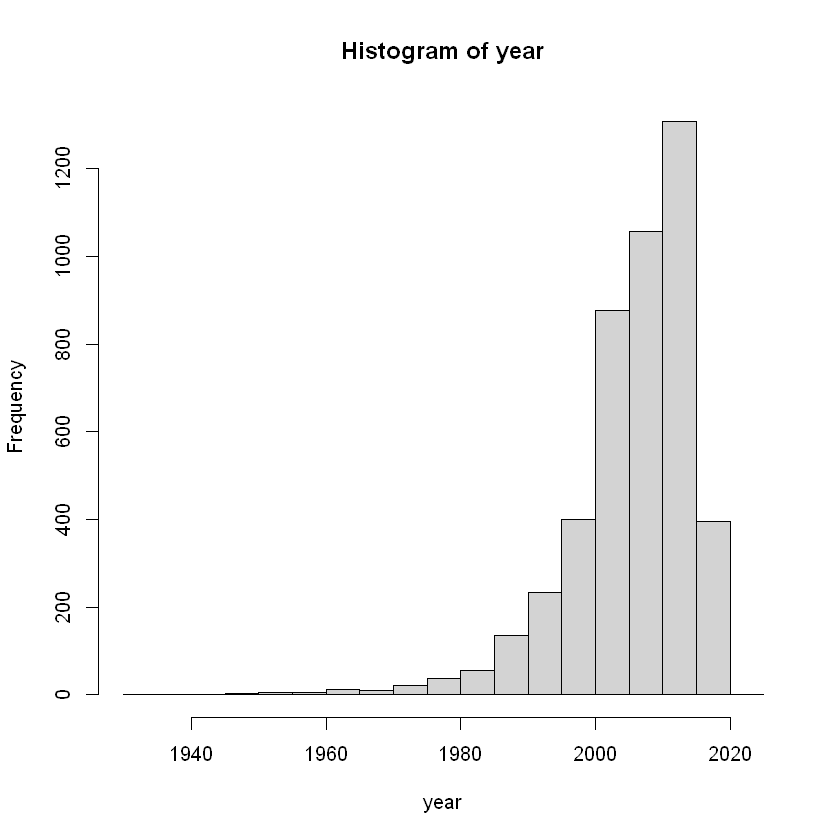

In [153]:
plik$publication_year[plik$publication_year == '6'] <- 2006
plik$publication_year[plik$publication_year == '17'] <- 2017

hist(year)
min(year)
max(year)

### publisher
wydawnictwo, chr, także zawiera braki (836)

In [116]:
pub2 <- plik$publisher
pub <- na.omit(pub2)
length(pub2) - length(pub)

[1] 836

In [117]:
pp <- as.data.frame(table(pub))
sorted_pub_count <- pp[order(-pp$Freq),]
sorted_pub_count[1:10,]

,pub,Freq
,<fct>,<int>
813,Minotaur Books,83
104,Bantam,81
103,Ballantine Books,79
499,Grand Central Publishing,73
475,G.P. Putnam's Sons,69
1320,Vintage Crime/Black Lizard,69
131,Berkley,64
973,Pocket Books,61
931,Penguin Books,59


### language_code
kod języka w której została napisana książka, chr, wszystkie wartosci <br>
top 10 jezykow ponizej, angielski ma oczywiscie monopol

In [118]:
lang2 <- plik$language_code
lang <- na.omit(lang2)
length(lang2) - length(lang)

[1] 0

In [119]:
ll <- as.data.frame(table(lang))
sorted_lang_count <- ll[order(-ll$Freq),]
sorted_lang_count[1:10,]

,lang,Freq
,<fct>,<int>
7,eng,4772
6,en-US,244
5,en-GB,119
9,fre,22
23,spa,22
16,nl,16
24,swe,12
4,en-CA,11
19,por,9


### num_pages
liczba stron, int, brak 814 danych, wartosci od 0 do 27500

In [125]:
pag2 <- plik$num_pages
pag <- na.omit(pag2)
length(pag2) - length(pag)

[1] 814

[1] 0

[1] 27500

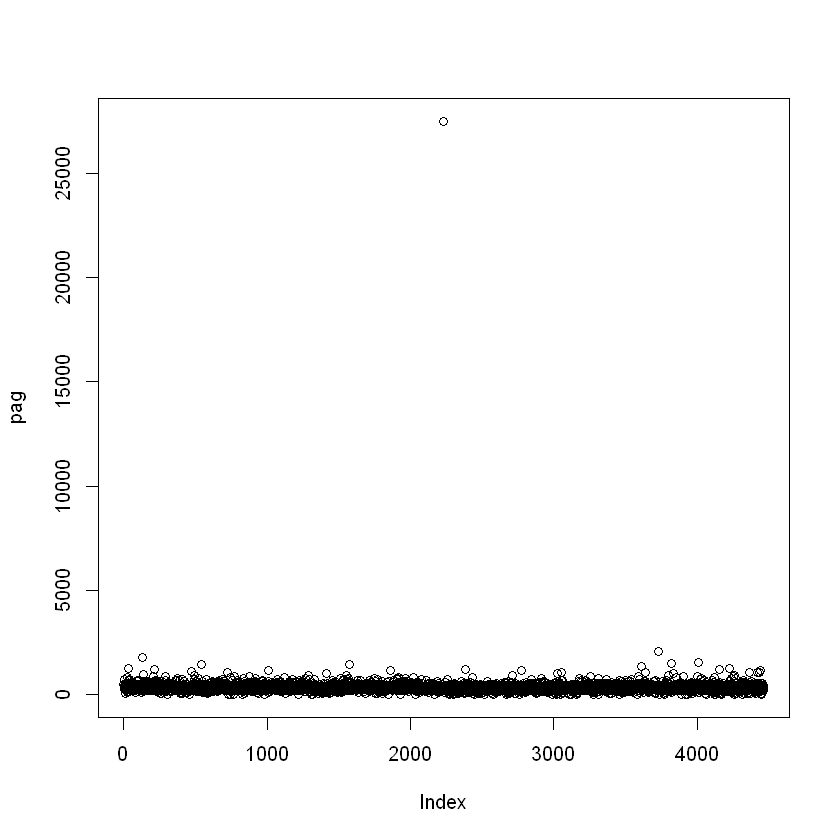

In [126]:
min(pag)
max(pag)
plot(pag)

### average_rating
średnia ocena książki, typ dbl - double class. A double-precision floating point number, zadnych braków poza kilkoma 0, wartosci miedzy 0 a 5

[1] 0

[1] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.61 2.27 2.44 2.49 2.50
  [15] 2.50 2.60 2.67 2.67 2.70 2.75 2.78 2.80 2.80 2.82 2.83 2.86 2.86 2.88
  [29] 2.92 2.93 2.93 2.98 2.99 3.00 3.00 3.00 3.00 3.00 3.00 3.00 3.00 3.00
  [43] 3.00 3.00 3.00 3.00 3.00 3.00 3.03 3.05 3.06 3.06 3.07 3.09 3.10 3.11
  [57] 3.12 3.12 3.12 3.12 3.12 3.12 3.12 3.13 3.13 3.14 3.14 3.14 3.14 3.15
  [71] 3.15 3.15 3.15 3.15 3.16 3.17 3.17 3.17 3.19 3.19 3.20 3.20 3.20 3.20
  [85] 3.21 3.22 3.22 3.22 3.22 3.22 3.22 3.22 3.22 3.22 3.22 3.22 3.23 3.23
  [99] 3.23 3.23 3.23 3.23 3.23 3.23 3.23 3.23 3.23 3.23 3.23 3.24 3.24 3.24
 [113] 3.24 3.24 3.24 3.25 3.25 3.25 3.25 3.25 3.25 3.25 3.26 3.26 3.26 3.26
 [127] 3.26 3.26 3.27 3.27 3.27 3.27 3.27 3.27 3.27 3.27 3.28 3.28 3.28 3.28
 [141] 3.28 3.29 3.29 3.29 3.30 3.30 3.30 3.30 3.31 3.31 3.31 3.31 3.31 3.31
 [155] 3.32 3.32 3.32 3.32 3.32 3.32 3.32 3.32 3.32 3.32 3.32 3.33 3.33 3.33
 [169] 3.33 3.33 3.33 3.33 3.33 3.33 3.33 3.33 3.34 3.34 3.34 3.35 3.35 3.35
 [183] 3.35 3.35 3.35 3.35 3.36 3.36 3.36 3.36 3.36 3.36 3.36 3.36 3.37 3.37
 [197] 3.37 3.37 3.37 3.37 3.37 3.37 3.37 3.37 3.37 3.38 3.38 3.38 3.38 3.38
 [211] 3.38 3.38 3.38 3.38 3.38 3.39 3.39 3.39 3.39 3.39 3.39 3.39 3.39 3.39
 [225] 3.39 3.39 3.39 3.39 3.39 3.39 3.39 3.40 3.40 3.40 3.40 3.40 3.40 3.40
 [239] 3.40 3.40 3.41 3.41 3.41 3.41 3.41 3.41 3.41 3.41 3.41 3.41 3.41 3.41
 [253] 3.42 3.42 3.42 3.42 3.42 3.42 3.42 3.42 3.42 3.42 3.42 3.42 3.42 3.43
 [267] 3.43 3.43 3.43 3.43 3.43 3.43 3.43 3.43 3.43 3.43 3.44 3.44 3.44 3.44
 [281] 3.44 3.44 3.44 3.44 3.44 3.44 3.44 3.44 3.44 3.44 3.44 3.45 3.45 3.45
 [295] 3.45 3.45 3.45 3.45 3.45 3.45 3.45 3.45 3.45 3.45 3.45 3.45 3.46 3.46
 [309] 3.46 3.46 3.46 3.46 3.46 3.46 3.46 3.46 3.46 3.47 3.47 3.47 3.47 3.47
 [323] 3.47 3.47 3.47 3.47 3.47 3.47 3.47 3.47 3.47 3.47 3.47 3.47 3.47 3.48
 [337] 3.48 3.48 3.48 3.48 3.48 3.48 3.48 3.48 3.48 3.48 3.48 3.48 3.48 3.48
 [351] 3.48 3.48 3.49 3.49 3.49 3.49 3.49 3.49 3.49 3.49 3.49 3.49 3.49 3.49
 [365] 3.49 3.49 3.49 3.49 3.49 3.49 3.50 3.50 3.50 3.50 3.50 3.50 3.50 3.50
 [379] 3.50 3.50 3.50 3.50 3.50 3.50 3.50 3.50 3.50 3.50 3.50 3.50 3.50 3.50
 [393] 3.51 3.51 3.51 3.51 3.51 3.51 3.51 3.51 3.51 3.51 3.51 3.51 3.51 3.52
 [407] 3.52 3.52 3.52 3.52 3.52 3.52 3.52 3.52 3.52 3.52 3.52 3.52 3.52 3.52
 [421] 3.52 3.52 3.52 3.52 3.52 3.52 3.52 3.53 3.53 3.53 3.53 3.53 3.53 3.53
 [435] 3.53 3.53 3.53 3.53 3.53 3.53 3.53 3.53 3.53 3.53 3.53 3.54 3.54 3.54
 [449] 3.54 3.54 3.54 3.54 3.54 3.54 3.54 3.54 3.54 3.54 3.54 3.54 3.54 3.54
 [463] 3.54 3.54 3.54 3.54 3.54 3.54 3.54 3.54 3.55 3.55 3.55 3.55 3.55 3.55
 [477] 3.55 3.55 3.55 3.55 3.55 3.55 3.55 3.55 3.55 3.55 3.55 3.55 3.55 3.55
 [491] 3.55 3.55 3.55 3.55 3.55 3.55 3.55 3.55 3.55 3.56 3.56 3.56 3.56 3.56
 [505] 3.56 3.56 3.56 3.56 3.56 3.56 3.56 3.56 3.56 3.57 3.57 3.57 3.57 3.57
 [519] 3.57 3.57 3.57 3.57 3.57 3.57 3.57 3.57 3.57 3.57 3.57 3.57 3.57 3.57
 [533] 3.57 3.57 3.57 3.57 3.57 3.57 3.57 3.57 3.57 3.57 3.57 3.57 3.57 3.57
 [547] 3.57 3.58 3.58 3.58 3.58 3.58 3.58 3.58 3.58 3.58 3.58 3.58 3.58 3.58
 [561] 3.58 3.58 3.58 3.58 3.58 3.58 3.58 3.58 3.58 3.59 3.59 3.59 3.59 3.59
 [575] 3.59 3.59 3.59 3.59 3.59 3.59 3.59 3.59 3.59 3.59 3.59 3.59 3.59 3.59
 [589] 3.59 3.59 3.59 3.59 3.59 3.59 3.59 3.59 3.59 3.59 3.59 3.60 3.60 3.60
 [603] 3.60 3.60 3.60 3.60 3.60 3.60 3.60 3.60 3.60 3.60 3.60 3.60 3.60 3.60
 [617] 3.60 3.60 3.60 3.60 3.60 3.60 3.60 3.60 3.61 3.61 3.61 3.61 3.61 3.61
 [631] 3.61 3.61 3.61 3.61 3.61 3.61 3.61 3.61 3.61 3.61 3.61 3.61 3.61 3.61
 [645] 3.61 3.61 3.61 3.61 3.61 3.61 3.61 3.61 3.61 3.61 3.61 3.61 3.61 3.61
 [659] 3.61 3.62 3.62 3.62 3.62 3.62 3.62 3.62 3.62 3.62 3.62 3.62 3.62 3.62
 [673] 3.62 3.62 3.62 3.62 3.62 3.62 3.62 3.62 3.62 3.62 3.62 3.63 3.63 3.63
 [687] 3.63 3.63 3.63 3.63 3.63 3.63 3.63 3.63 3.63 3.63 3.63 3.63 3.63 3.63
 [701] 3.63 3.63 3.63 3.63 3.63 3.63 3.63 3.63 3.63 3.63 3.63 3.63 3.63 3.63
 [715] 3.63 3.63 3.63 3.63 3.63 3.63 3.63 3.64 3.64 3.64 3.64 3.64 3.64 3.64

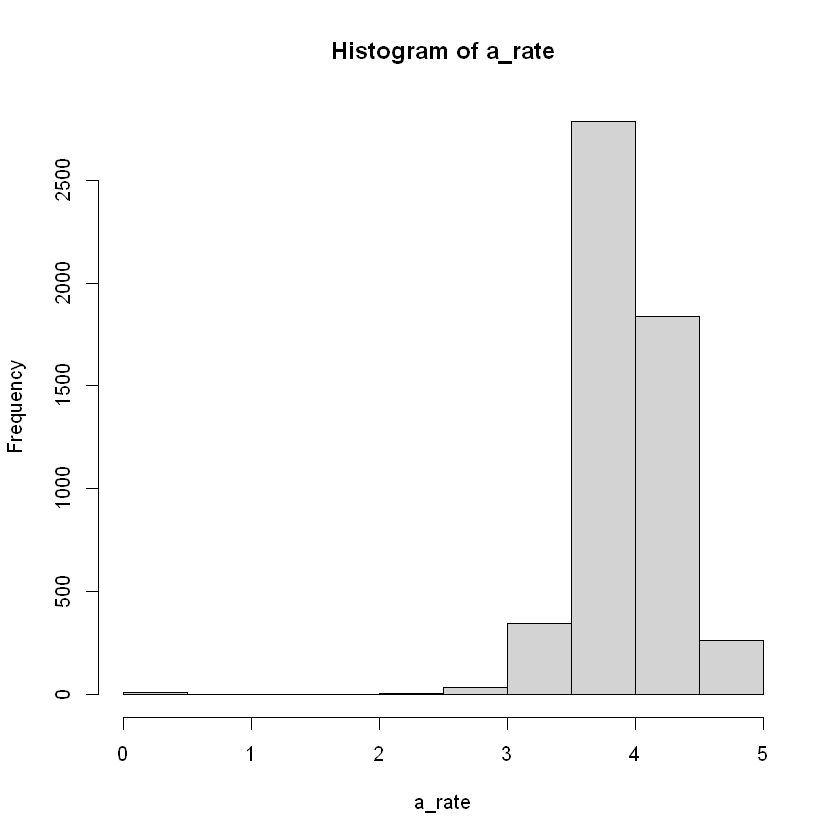

In [133]:
a_rate2 <- plik$average_rating
a_rate <- na.omit(a_rate2)
length(a_rate2) - length(a_rate)
sort(a_rate)
hist(a_rate)

### ratings_count
liczba ocen wydanych na książkę, int, wartosci od 0 do 6247740, żadnych braków

[1] 0

[1]       0       0       0       0       0       0       0       0       0
  [10]       0       0       0       0       0       0       0       1       1
  [19]       1       1       1       1       1       1       1       1       1
  [28]       1       1       1       1       1       1       1       1       1
  [37]       1       1       1       1       1       1       1       1       1
  [46]       1       1       1       1       1       1       1       1       1
  [55]       1       1       1       1       1       1       2       2       2
  [64]       2       2       2       2       2       2       2       2       2
  [73]       2       2       2       2       2       2       2       2       2
  [82]       2       2       2       2       2       2       2       2       2
  [91]       2       2       2       2       2       2       2       2       2
 [100]       2       2       2       2       2       2       2       2       2
 [109]       2       2       2       2       2       2       2       2       2
 [118]       2       2       2       2       2       3       3       3       3
 [127]       3       3       3       3       3       3       3       3       3
 [136]       3       3       3       3       3       3       3       3       3
 [145]       3       3       3       3       3       3       3       3       3
 [154]       3       3       3       3       3       3       3       3       3
 [163]       3       3       3       3       3       3       3       3       3
 [172]       3       3       3       3       3       3       3       3       3
 [181]       3       3       3       3       3       3       3       3       3
 [190]       3       3       3       3       3       4       4       4       4
 [199]       4       4       4       4       4       4       4       4       4
 [208]       4       4       4       4       4       4       4       4       4
 [217]       4       4       4       4       4       4       4       4       4
 [226]       4       4       4       4       4       4       4       4       4
 [235]       4       4       4       4       4       4       4       4       4
 [244]       4       4       4       4       4       4       4       4       4
 [253]       4       4       4       4       4       4       4       4       5
 [262]       5       5       5       5       5       5       5       5       5
 [271]       5       5       5       5       5       5       5       5       5
 [280]       5       5       5       5       5       5       5       5       5
 [289]       5       5       5       5       5       5       5       5       5
 [298]       5       5       5       5       5       5       5       6       6
 [307]       6       6       6       6       6       6       6       6       6
 [316]       6       6       6       6       6       6       6       6       6
 [325]       6       6       6       6       6       6       6       6       6
 [334]       6       6       6       6       6       6       6       6       6
 [343]       6       6       6       6       6       6       6       6       7
 [352]       7       7       7       7       7       7       7       7       7
 [361]       7       7       7       7       7       7       7       7       7
 [370]       7       7       7       7       7       7       7       7       7
 [379]       7       7       7       7       7       7       7       7       7
 [388]       7       7       7       7       7       7       7       7       7
 [397]       7       7       7       7       7       8       8       8       8
 [406]       8       8       8       8       8       8       8       8       8
 [415]       8       8       8       8       8       8       8       8       8
 [424]       8       8       8       8       8       8       8       8       8
 [433]       8       8       8       8       8       8       8       9       9
 [442]       9       9       9       9       9       9       9       9       9
 [451]       9       9       9       9       9       

[1] 30241.33

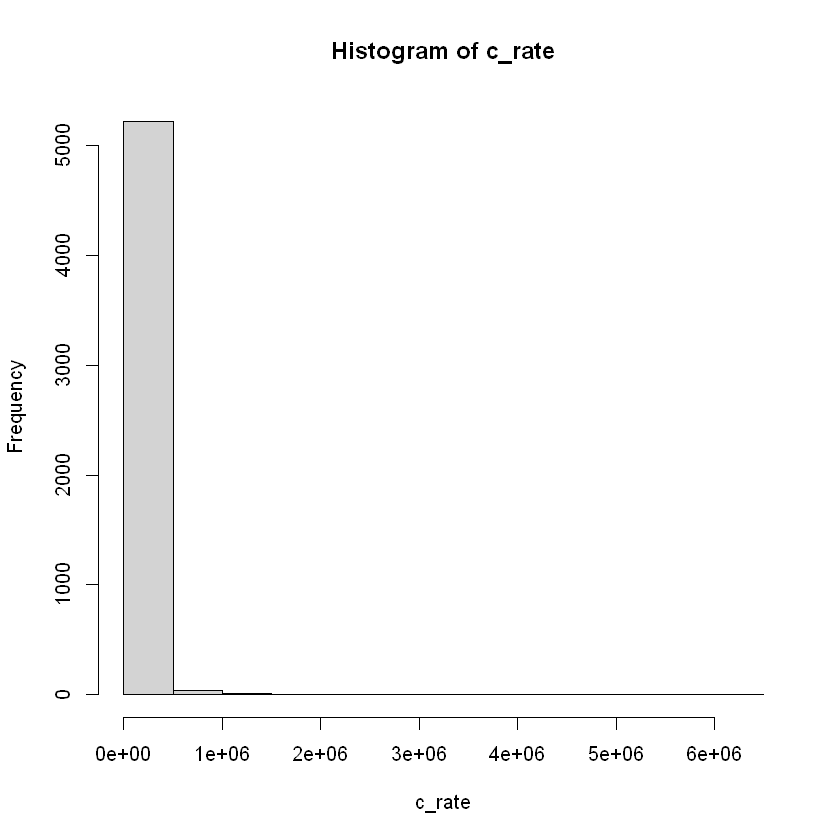

In [390]:
c_rate2 <- plik$ratings_count
c_rate <- na.omit(c_rate2)
length(c_rate2) - length(c_rate)
sort(c_rate)
hist(c_rate)
mean(c_rate)

------
# ODPOWIEDZI NA PYTANIA
-----

top 10 Książek z największą ilością ocen (faktycznie znane te ksiąki)

In [257]:
plik2[plik2$ratings_count == max(plik2$ratings_count),]

,book_rank,id,title,book_author,publication_year,publisher,language_code,num_pages,average_rating,ratings_count
,<int>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<dbl>,<int>
3386,3107,3,"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",J.K. Rowling,2003,Scholastic Inc,eng,309,4.47,6247740


In [258]:
plik2[order(-plik2$ratings_count),][1:10,]

,book_rank,id,title,book_author,publication_year,publisher,language_code,num_pages,average_rating,ratings_count
,<int>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<dbl>,<int>
3386,3107,3,"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",J.K. Rowling,2003,Scholastic Inc,eng,309,4.47,6247740
1279,1277,2767052,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,2008,Scholastic Press,eng,374,4.33,5867734
113,113,2657,To Kill a Mockingbird,Harper Lee,2006,Harper Perennial Modern Classics,eng,324,4.27,4063329
970,970,5907,"The Hobbit, or There and Back Again",J.R.R. Tolkien,2002,Houghton Mifflin,eng,366,4.27,2568612
3883,3774,48855,The Diary of a Young Girl,Anne Frank,1993,Bantam,eng,283,4.14,2503131
478,478,5107,The Catcher in the Rye,J.D. Salinger,2001,Back Bay Books,eng,277,3.80,2489479
3,3,960,"Angels & Demons (Robert Langdon, #1)",Dan Brown,2006,Pocket Books,eng,736,3.90,2450604
1,1,2429135,"The Girl with the Dragon Tattoo (Millennium, #1)",Stieg Larsson,2008,Knopf,eng,465,4.13,2323151
1350,1346,34,"The Fellowship of the Ring (The Lord of the Rings, #1)",J.R.R. Tolkien,2003,Houghton Mifflin Harcourt,eng,398,4.36,2155473


## 1 How did the popularity of Books change in the last decade? - CZAS VS COUNT <br>

In [146]:
## rok publikacji
length(year)
## ratings count
length(c_rate)

##nie zgadzają się długości więc kombinujemy inaczej

[1] 4554

[1] 5281

In [155]:
year_vs_count <- na.omit(data.frame(plik$publication_year, plik$ratings_count))
year_vs_count

,plik.publication_year,plik.ratings_count
,<dbl>,<int>
1,2008,2323151
2,2004,642138
3,2006,2450604
4,2013,200400
5,1994,463437
6,2002,287416
7,2006,1875378
8,1994,244807
9,2000,544744


In [164]:
##szybki check czy się to 6 i 17 zmieniło
min(year_vs_count[,1])

[1] 1934

In [227]:
sums <- c()
i = 1
for (y in seq(1934, 2021, 1)) {
    sums[i] = sum(year_vs_count[year_vs_count[,1] == y,][2])
    i = i+1
}
sums
year_count <- data.frame(year = seq(1934, 2021, 1), ratings_count = sums) 



[1]       50        0        0        9        0        0        0        0
 [9]        0        0        0        2        0        0        0      466
[17]        0     7544        0        6        0     3063       37        0
[25]        0    11753     9714     2284     6518   577323      129    22651
[33]       12     1689       24      104     8680    64069    14108   672185
[41]    59766    48799   333697    70300   190173   104981   178926       35
[49]   157268   179091   301316   246573  1433046  1350936   901169   660294
[57]   817862   716976   274577  2859898  1610454  1733283  1474735  1046306
[65]  3827782  7021329  3475247  6885647  7518149 16629321 10936665 11718189
[73] 23609016  4676283 10860789  4061906  5134918  3351504  3237061  3505323
[81]  4062712  2959917  1947790  1158687  1105037   436153    17349       11

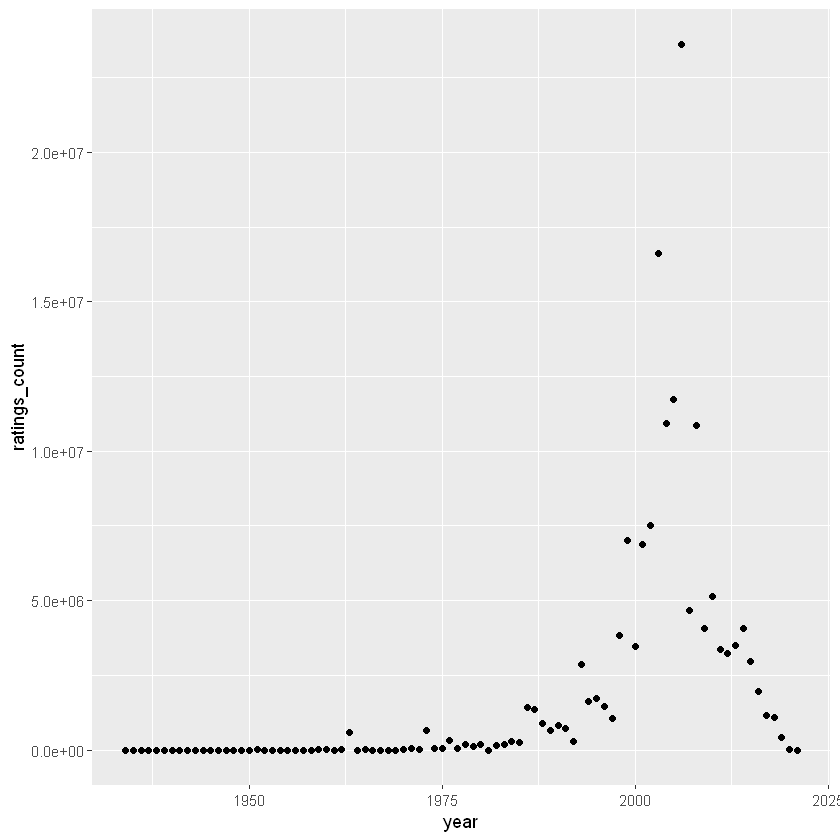

In [228]:
p <- ggplot(year_count, aes(x=year, y=ratings_count)) + geom_point()
p

In [230]:

year_count[year_count$ratings_count == max(year_count),]

,year,ratings_count
,<dbl>,<int>
73,2006,23609016


Czyli największe zainteresowanie (<=> największa łączna ilość ocen, która została przyznana książkom wydanym w danym roku) występuje dla książek wydanych w 2006. bardzo małe zainteresowanie jest dla książek z okresu około 1934- 1980, później osiąga maksimum w 2006 i znowu spada. Bardzo mało ocen zostalo wydanych dla książek swiezo wydanych --> może nie zdążyli ich przeczytać jeszcze 

A teraz średnia liczba ocen wydana na książkę

In [272]:
avg <- c()
books_per_year <- c()
i = 1
for (y in seq(1934, 2021, 1)) {
    if (sum(year_vs_count[,1] == y) == 0) {
        avg[i] = 0
        books_per_year[i] = 0
    }
    else {
    avg[i] = sum(year_vs_count[year_vs_count[,1] == y,][2])/sum(year_vs_count[,1] == y)
    books_per_year[i] = sum(year_vs_count[,1] == y)
        }
    i = i+1
}
max(avg)
year_count$avg_rating <- avg
year_count$books_per_year <- books_per_year

[1] 192441

o ale tu ciekawostka, rok z największą srednią ilością ocen na książkę to 1963

In [274]:
plik2[plik2$publication_year == 1963,]

,book_rank,id,title,book_author,publication_year,publisher,language_code,num_pages,average_rating,ratings_count
,<int>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<dbl>,<int>
99,99,332613,One Flew Over the Cuckoo's Nest,Ken Kesey,1963,Signet,eng,325,4.20,574129
1223,1222,618604,"The Man With The Getaway Face (Parker, #2)",Richard Stark,1963,Pocket Books,eng,225,4.02,3190
5280,5269,15841085,De Saint en de zieke professor,Leslie Charteris,1963,A.W. Bruna & Zoon,nl,188,3.00,4


top 5 lata z największą średnią ilością ocen,  2006 co ciekawe dopiero na 4tym miejscu

In [271]:
year_count[order(-year_count$avg_rating),][1:5,]

,year,ratings_count,avg_rating,books_per_year
,<dbl>,<int>,<dbl>,<dbl>
30,1963,577323,192441.00,3
40,1973,672185,168046.25,4
70,2003,16629321,98398.35,169
73,2006,23609016,81410.40,290
66,1999,7021329,76318.79,92


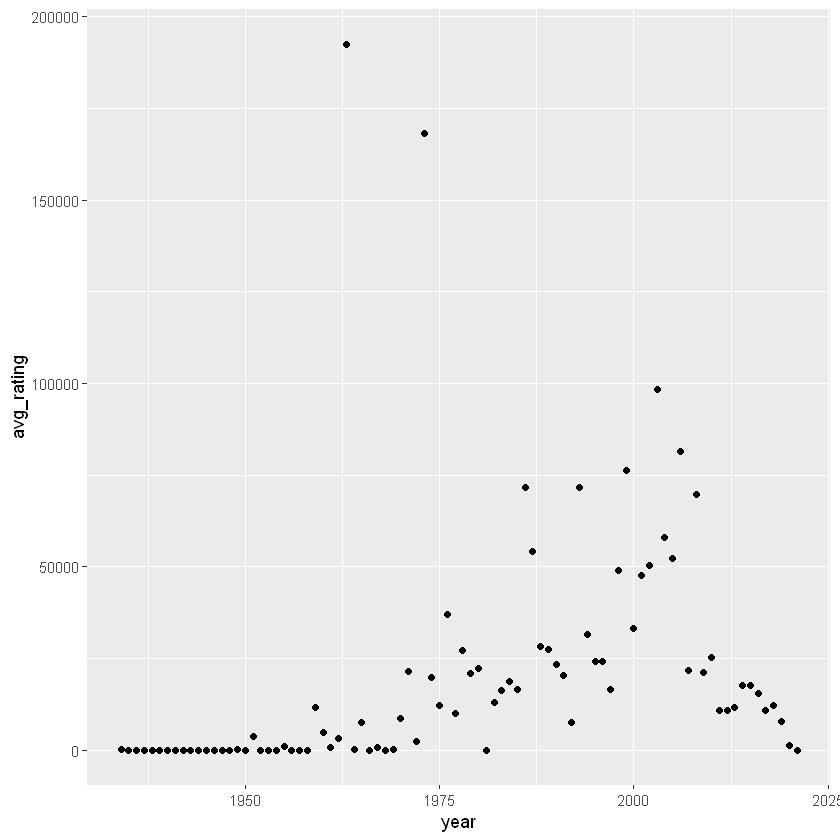

In [241]:
p <- ggplot(year_count, aes(x=year, y=avg_rating)) + geom_point()
p

#### Wniosek? 
Najwięcej znanych (najbardziej interesujących) książek pochodzi z przedziału (2000,2010) (w szczególności 2006) -> wynika to z łącznej ilosci oddanych głosów. <br>
Aczkolwiek we wcześniejszych latach powstały klasyki takie jak np hit z 1963 ['One Flew Over the Cuckoo's Nest'], który spowodował, że to on jest top rokiem względem średniej ilości głosów oddanych na książkę. Jest to skutek małej ilości książek wydanych w danym roku. <br>
ogółem jednak 2006 zdominował rynek książek pod względem zainteresowania.

## 2. num_pages VS count
Czyli czy ilość stron ma wpływ na zainteresowanie książką

In [278]:
## ratings count
length(na.omit(plik$ratings_count))
##  ilość stron
length(na.omit(plik$num_pages))


[1] 5281

[1] 4467

In [312]:
num_vs_count <- na.omit(data.frame(num_pages = plik$num_pages, ratings_count = plik$ratings_count))
num_vs_count_ordered <- num_vs_count[order(num_vs_count$num_pages),]

Nie widać jakiejś wyraźnej zależności, a wręcz żadnej, aczkolwiek dla ilosci stron miedzy 200 a 500 jest dużo bardzo wysokich wartosci - tam własnie wpadają najbardziej interesujące książki<br>
dla przypomnienia ksiazka z najwiekszym rating_count:


In [313]:
plik2[plik2$ratings_count == max(plik2$ratings_count),]

,book_rank,id,title,book_author,publication_year,publisher,language_code,num_pages,average_rating,ratings_count
,<int>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<dbl>,<int>
3386,3107,3,"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",J.K. Rowling,2003,Scholastic Inc,eng,309,4.47,6247740


Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Warning message:
"Removed 26 rows containing missing values (geom_point)."


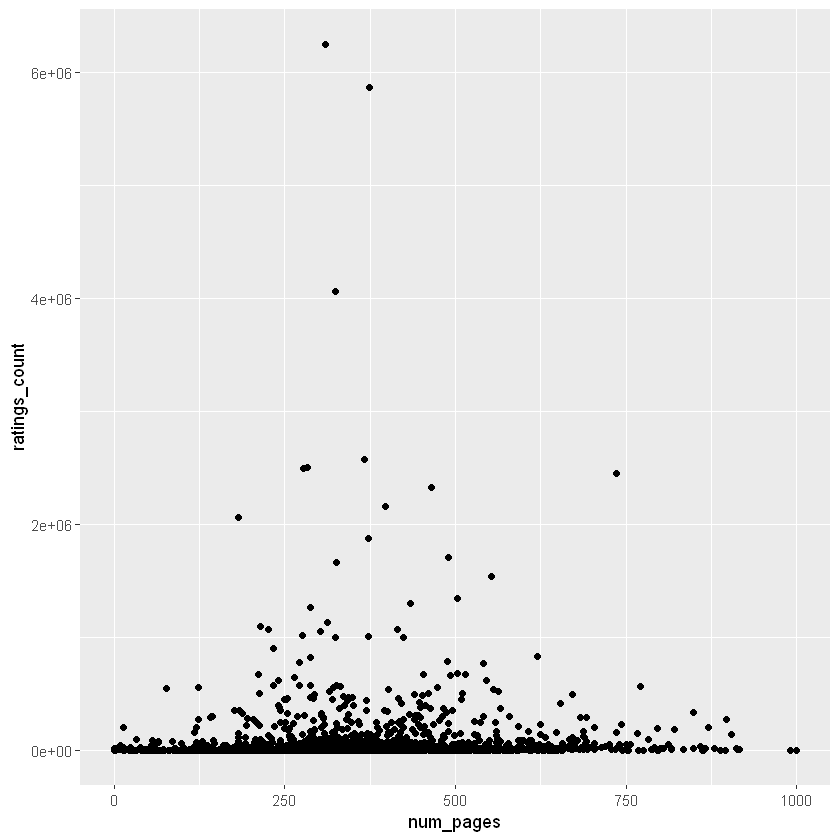

In [290]:
p <- ggplot(num_vs_count_ordered, aes(x=num_pages, y=ratings_count)) + geom_point() + scale_x_continuous(limits=c(0,1000))

p

wyliczam łączną ilość ratingów dla ilosci stron (w przedziałach (0,ns),(ns,2ns),...) 

In [341]:
n_p <- c()
i <- 1
ns <- 50

for (n in seq(ns, max(plik2$num_pages), ns)) {
    n_p[i] <- sum(num_vs_count_ordered[num_vs_count_ordered$num_pages < n & num_vs_count_ordered$num_pages >= n - ns ,2])
    i <- i+1 
}
count_per_pages <- data.frame(less_than_pages = seq(ns, max(plik2$num_pages), ns), overall_count = n_p)

Warning message:
"Removed 510 rows containing missing values (geom_point)."


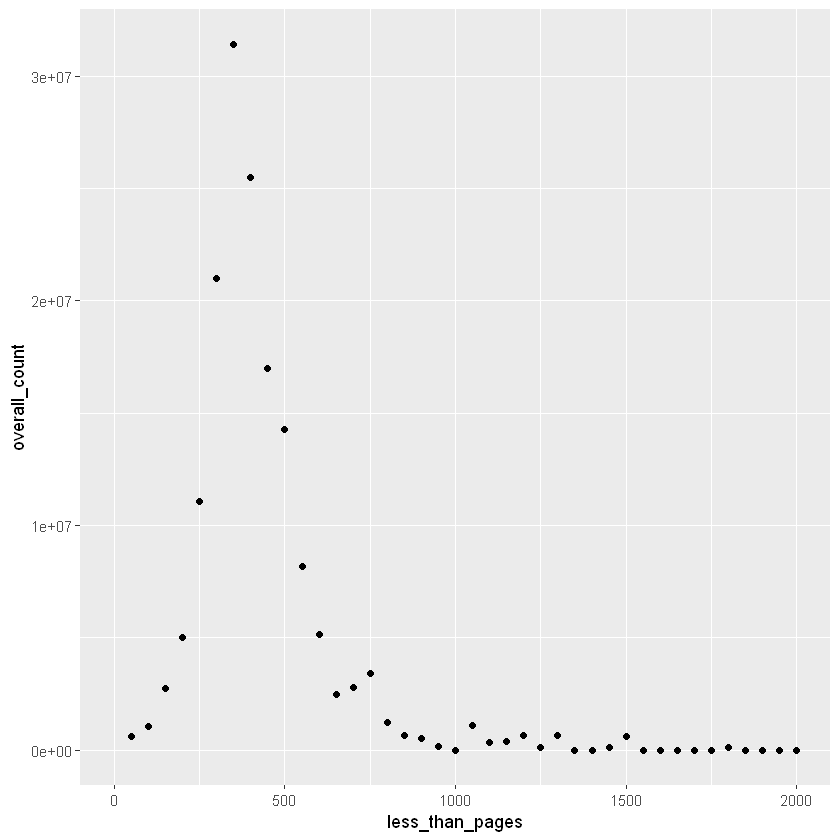

In [340]:
p <- ggplot(count_per_pages, aes(x=less_than_pages, y=overall_count)) + geom_point() + scale_x_continuous(limits=c(0,2000))

p
##rysuje to tak żeby było cokolwiek widać


In [344]:
count_per_pages[count_per_pages$overall_count == max(count_per_pages$overall_count),]

,less_than_pages,overall_count
,<dbl>,<int>
7,350,31421799


no i w ten sposob wiadomo że najwięcej ratingów zebrały książki z przedziału 250 - 500 (na co wskazywał trochę pierwszy wykres). <br>
a dokładniej, według naszej podziałki, przedział [300,350)

za to boxplot jest ciekawy, według niego jest jakaś tendencja zwyżkowa pod względem zainteresowania książką a ilością stron<br>
średnia ilość ratings_count rośnie wraz ze wzrostem liczby stron (stosując podział liczby stron co 50) , zauważyć jednak można, że krótszych książek jest więcej niż tych dłuższych (tym samym średnia jest oparta na większej ilości danych oraz widocznych jest więcej wartosci odstajacych), co trochę zaburza zamysł, więc sytuacja jest podobna jak z year vs count .

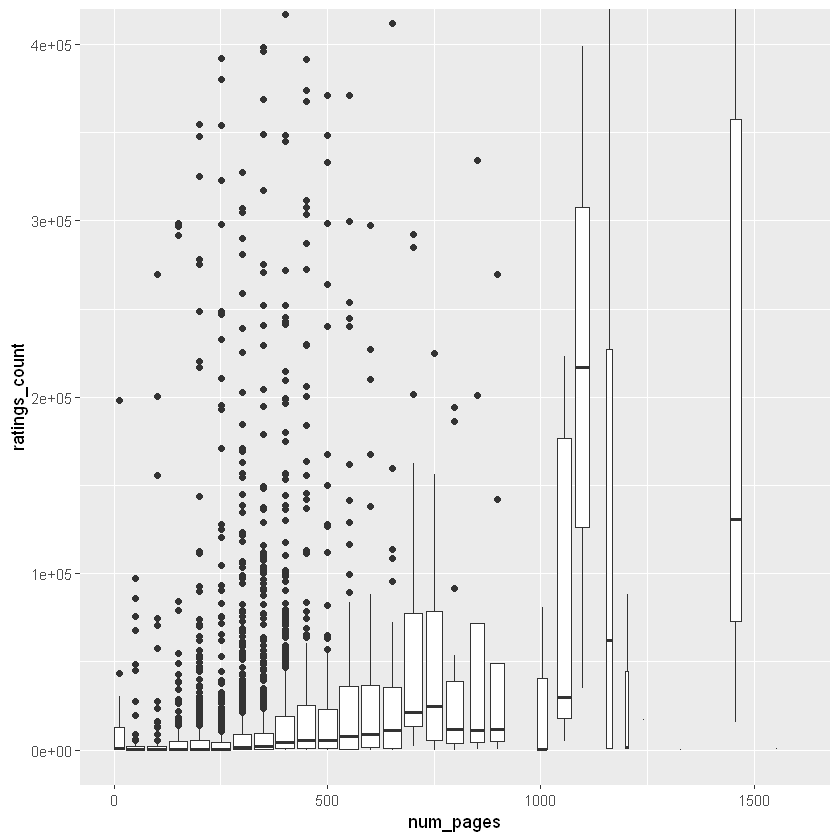

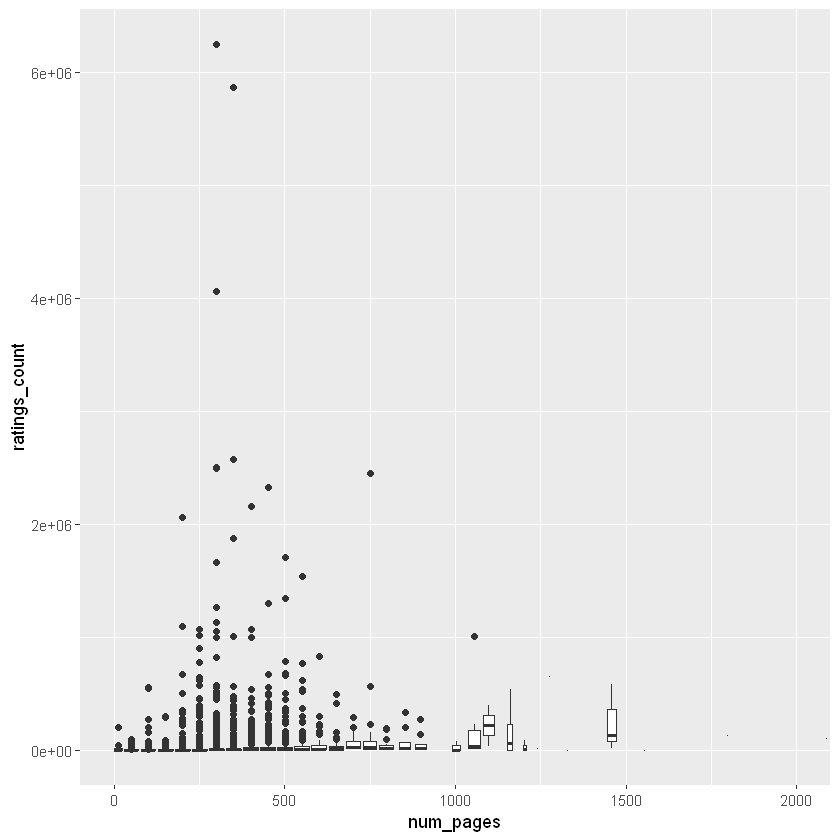

In [339]:
##wersja na której coś widać
p1 <- ggplot(num_vs_count_ordered, aes(x=num_pages, y=ratings_count)) +
geom_boxplot(aes(group = cut_width(num_pages, 50))) +coord_cartesian(xlim =c(0,1600), ylim = c(0, 400000))
p1

## wersja ogólna na której nic nie widać
p2 <- ggplot(num_vs_count_ordered, aes(x=num_pages, y=ratings_count)) +
geom_boxplot(aes(group = cut_width(num_pages, 50))) +coord_cartesian(xlim =c(0,2000))
p2

In [345]:
max(plik2$num_pages) ##temu to jest takie w kosmos wywalone

[1] 27500

## 3. How are average rating and popularity related? AVG VS COUNT 

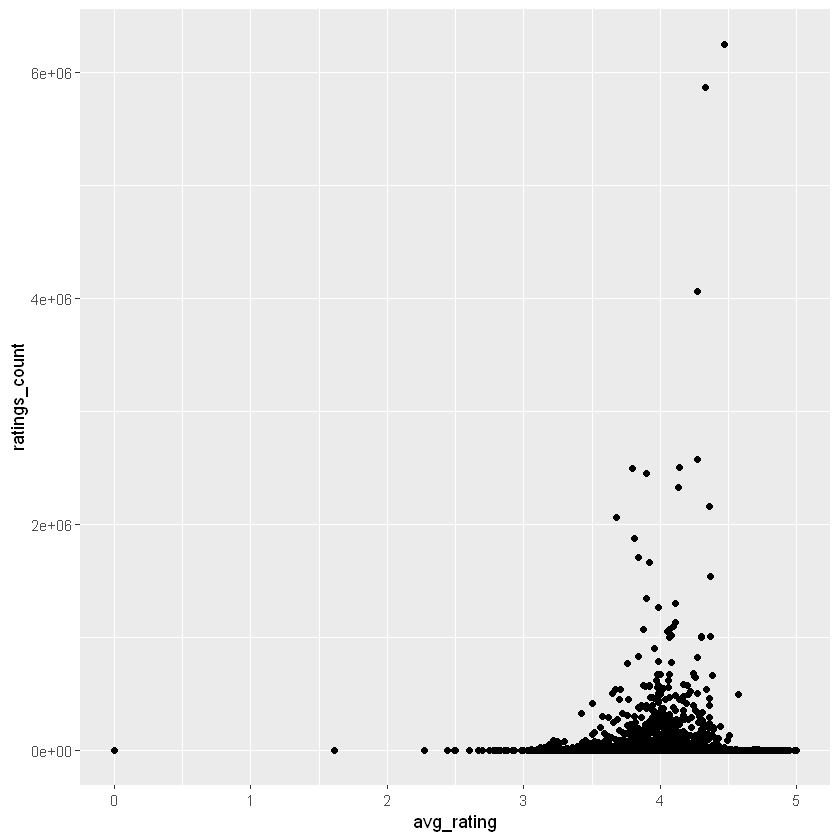

In [347]:
avg_vs_count <- na.omit(data.frame(avg_rating = plik$average_rating, ratings_count = plik$ratings_count))
p <- ggplot(avg_vs_count, aes(x=avg_rating, y=ratings_count)) + geom_point() #+ scale_x_continuous(limits=c(0,1000))

p

największa ilość ratingów wydaje się występować dla avg_count w okolicy 4 

In [350]:
n_r <- c()
i <- 1
ns <- 0.1

for (n in seq(ns, max(avg_vs_count$avg_rating), ns)) {
    n_r[i] <- sum(avg_vs_count[avg_vs_count$avg_rating < n & avg_vs_count$avg_rating >= n - ns ,2])
    i <- i+1 
}
avg_per_count <- data.frame(less_than_rating = seq(ns, max(avg_vs_count$avg_rating), ns), overall_count = n_r)

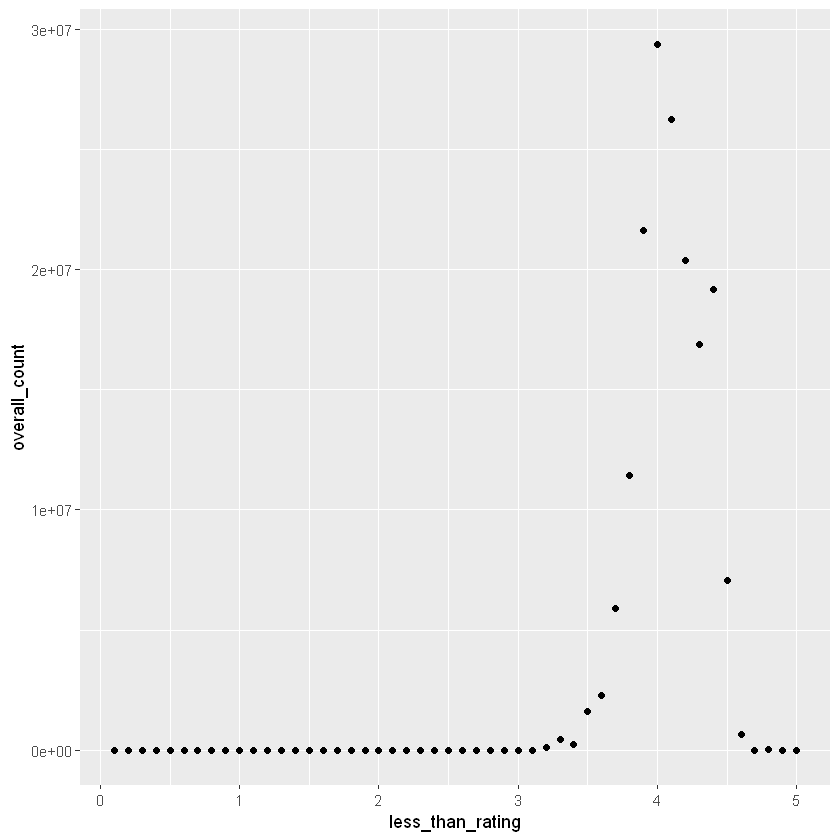

In [352]:
p <- ggplot(avg_per_count, aes(x=less_than_rating, y=overall_count)) + geom_point() 

p


No i wykres się zgadza z predykcjami - w przedziale (3.9, 4) jest największa łączna ilość ratingów <br>
### wnioski
Czyli największe zainteresowanie książką wiąże się z przeciętną oceną 4.0 <br>
Oczywiście ilość głosów ma duży wpływ na średnią ocen, gdyż gdy ocen jest mało, to średnia z nich nie oddaje zbyt dobrze rzeczywistości. To tylko zbiór opinii kilkorga ludzi, którzy mogą mieć swoje własne gusta i nie oddawać ogólnej opinii społeczeństwa (mogą ją zaniżać albo zawyżać). Dopiero wieksza ilość danych (większe zainteresowanie) kształtuje właściwą ocenę książki. 
<br>
Aczkolwiek widać, że jest niewiele książek z oceną niższą niż 3 (jest to w koncu zbiór najlepszych książek, wiec duh), a także niewiele książek z oceną bliską 5 (społeczeństwo zazwyczaj nie jest aż tak zgodne w tej kwestii, żeby wszyscy uważali książkę za idealną i wartą najwyższej oceny, jeśli już jakaś książka jest bliższa średniej 5.0 to dlatego, że głosów oddało na nią mniej osób (i w tym wypadku ocena mogła zostać lekko zawyzona)).
<br>
a sie rozpisałam
 

boxploty znowu

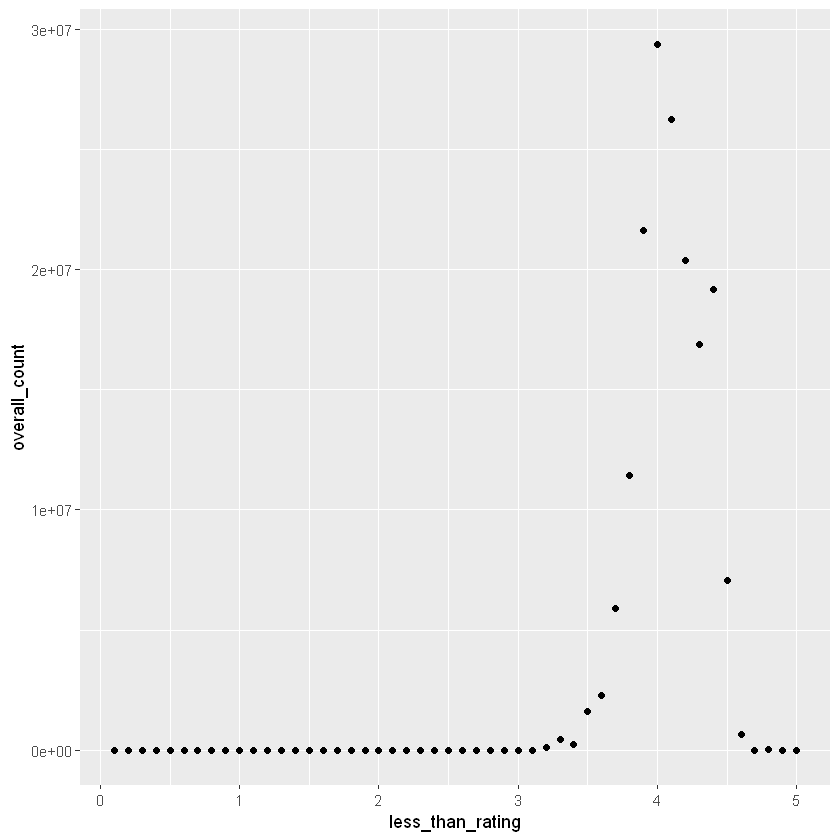

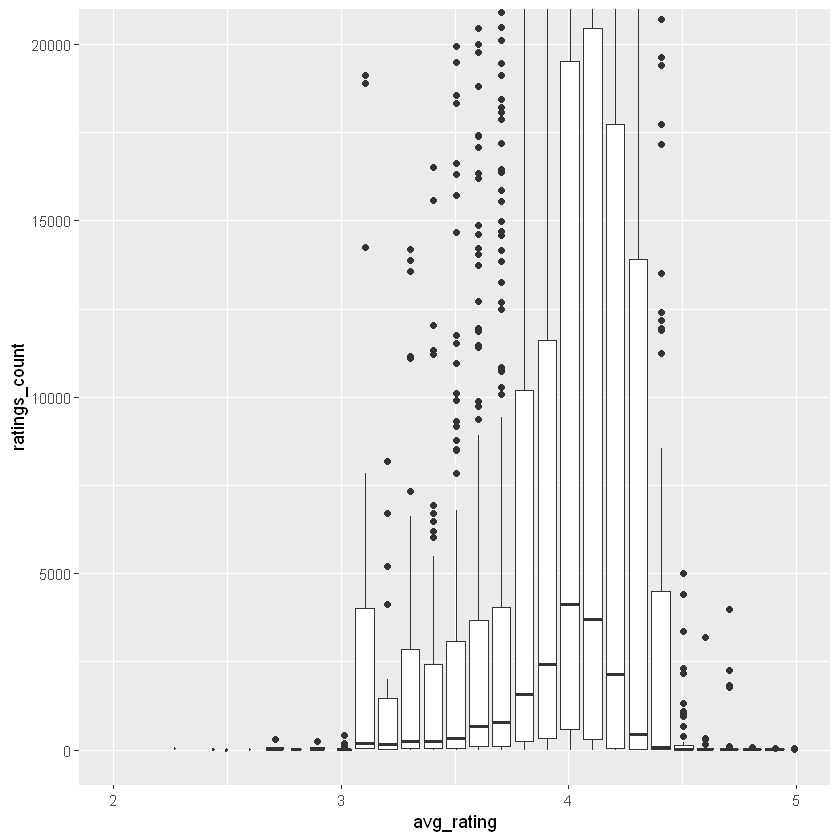

In [361]:
ggplot(avg_per_count, aes(x=less_than_rating, y=overall_count)) + geom_point() 

p1 <-ggplot(avg_vs_count, aes(x=avg_rating, y=ratings_count)) +
geom_boxplot(aes(group = cut_width(avg_rating, 0.1))) +coord_cartesian(xlim =c(2,5), ylim = c(0, 20000))
p1

no i tym razem także średnia ilość ratingów na avg ocenę jest praktycznie identyczna (nie to co było we wczesniejszych przypadkach), najwyzszy średni rating_count przypada na srednią ocenę w okolicach 3.9 - 4 

## 4. publisher VS count
czyli z lekka inna forma analizy bo to zmienna kategoryczna

In [363]:
##top 10 publisherów pod wzgledem ilosci wydanych ksiazek
pp <- as.data.frame(table(pub))
sorted_pub_count <- pp[order(-pp$Freq),]
sorted_pub_count[1:10,]

,pub,Freq
,<fct>,<int>
813,Minotaur Books,83
104,Bantam,81
103,Ballantine Books,79
499,Grand Central Publishing,73
475,G.P. Putnam's Sons,69
1320,Vintage Crime/Black Lizard,69
131,Berkley,64
973,Pocket Books,61
931,Penguin Books,59


wyliczamy łączną ilość głosów na książki wydane przez dane wydawnictwo


In [366]:
pub_vs_count <- na.omit(data.frame(publisher = plik$publisher, count = plik$ratings_count))
pub_vs_count

,publisher,count
,<chr>,<int>
1,Knopf,2323151
2,St. Martin's Press,642138
3,Pocket Books,2450604
4,"Little, Brown and Company",200400
5,Vintage,463437
6,NAL,287416
7,"Little, Brown and Company",1875378
8,Harvest Books,244807
9,Addison Wesley Publishing Company,544744


In [376]:
pubs <- unique(pub_vs_count$publisher)
pubs_count <- c()
pubs_avg_count <- c()
i <- 1

for (pb in pubs) {
    pubs_count[i] <- sum(pub_vs_count[pub_vs_count[,1] == pb,][2])
    pubs_avg_count[i] <- sum(pub_vs_count[pub_vs_count[,1] == pb,][2])/sum(pub_vs_count[,1] == pb)
    i <- i+1
}

publisher_count <- data.frame(publisher = pubs, ratings_count = pubs_count, ratings_avg_count = pubs_avg_count) 

top 5 wydawnictw z najwiekszą łączną ilością ocen

In [378]:
publisher_count[order(-publisher_count$ratings_count),][1:5,]

,publisher,ratings_count,ratings_avg_count
,<chr>,<int>,<dbl>
12,Penguin Books,6777997,114881.31
1076,Scholastic Inc,6247740,6247740.00
436,Scholastic Press,6087228,2029076.00
34,Bantam,5587398,68980.22
4,"Little, Brown and Company",5432257,142954.13


top 5 wydawnictw z najwyższą średnią ilością ocen na książkę

In [379]:
publisher_count[order(-publisher_count$ratings_avg_count),][1:5,]

,publisher,ratings_count,ratings_avg_count
,<chr>,<int>,<dbl>
1076,Scholastic Inc,6247740,6247740
436,Scholastic Press,6087228,2029076
73,Harper Perennial Modern Classics,5207640,1301910
1270,Random House Large Print Publishing,1301127,1301127
358,Houghton Mifflin,2568974,1284487


In [383]:
plik2[plik2$publisher == 'Penguin Books',]
plik2[plik2$publisher == 'Scholastic Inc',] 
plik2[plik2$publisher == 'Scholastic Press',]

,book_rank,id,title,book_author,publication_year,publisher,language_code,num_pages,average_rating,ratings_count
,<int>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<dbl>,<int>
13,13,1232,"The Shadow of the Wind (The Cemetery of Forgotten Books, #1)",Carlos Ruiz Zafón,2005,Penguin Books,eng,487,4.27,333243
19,19,2459785,"In the Woods (Dublin Murder Squad, #1)",Tana French,2008,Penguin Books,eng,431,3.77,42384
32,32,343,Perfume: The Story of a Murderer,Patrick Süskind,1987,Penguin Books,eng,263,4.02,232641
137,137,37435,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books,eng,302,4.05,1052456
147,147,608474,"The Sign of Four (Sherlock Holmes, #2)",Arthur Conan Doyle,2001,Penguin Books,eng,129,3.94,79392
190,190,27003,"The Eyre Affair (Thursday Next, #1)",Jasper Fforde,2003,Penguin Books,eng,374,3.89,99836
254,254,7624,Lord of the Flies,William Golding,1999,Penguin Books,eng,182,3.68,2059368
304,304,109901,"The Cold Dish (Walt Longmire, #1)",Craig Johnson,2006,Penguin Books,eng,354,4.13,20514
350,350,17250,The Crucible,Arthur Miller,2003,Penguin Books,eng,143,3.58,296671


,book_rank,id,title,book_author,publication_year,publisher,language_code,num_pages,average_rating,ratings_count
,<int>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<dbl>,<int>
3386,3107,3,"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",J.K. Rowling,2003,Scholastic Inc,eng,309,4.47,6247740


,book_rank,id,title,book_author,publication_year,publisher,language_code,num_pages,average_rating,ratings_count
,<int>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<dbl>,<int>
1279,1277,2767052,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,2008,Scholastic Press,eng,374,4.33,5867734
3660,3613,6654313,"Linger (The Wolves of Mercy Falls, #2)",Maggie Stiefvater,2010,Scholastic Press,eng,362,3.91,136590
5261,5242,10626594,The Scorpio Races,Maggie Stiefvater,2011,Scholastic Press,eng,409,4.09,82904


Penguin books zniknęło z top 5, Scholastic występuje w obu zestawieniach (dlatego że wydało ono hity, które zyskały bardzo duże ilości głosów, jednak łącznie mają tylko po 1 i 3 książkach). To naprawdę dobry wynik znalezc sie w top 3 majac tyle ksiazek wiec poszanowanko XD<br>
<br> Scholastic ink wydało Harry Potter and the Sorcerer's Stone -> najpopularniejsza książka z zestawienia
<br> scholastic press za to wydało The Hunger Games -> druga najpopularniejsza<br>
dla porownania penguin books wydało ich aż 59, nie wszystkie były aż takimi hitami, wiec zanizaja srednia 

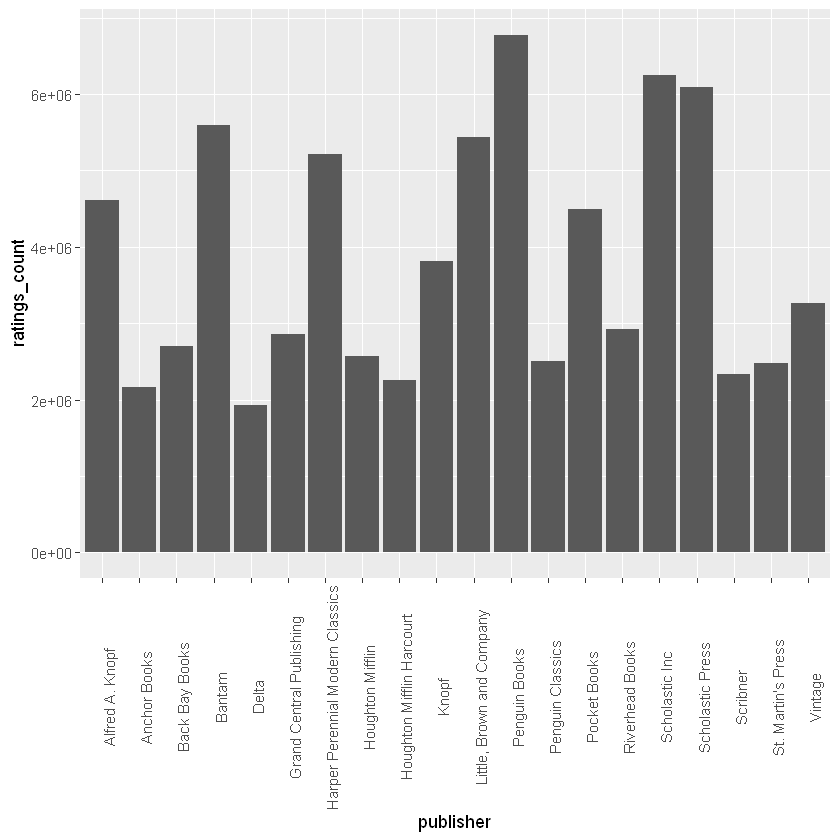

In [388]:
top20 <- publisher_count[order(-publisher_count$ratings_count),][1:20,]
p <- ggplot(top20, aes(x=publisher, y=ratings_count)) + geom_bar(stat="identity") + 
theme(axis.text.x = element_text(angle = 90))

p

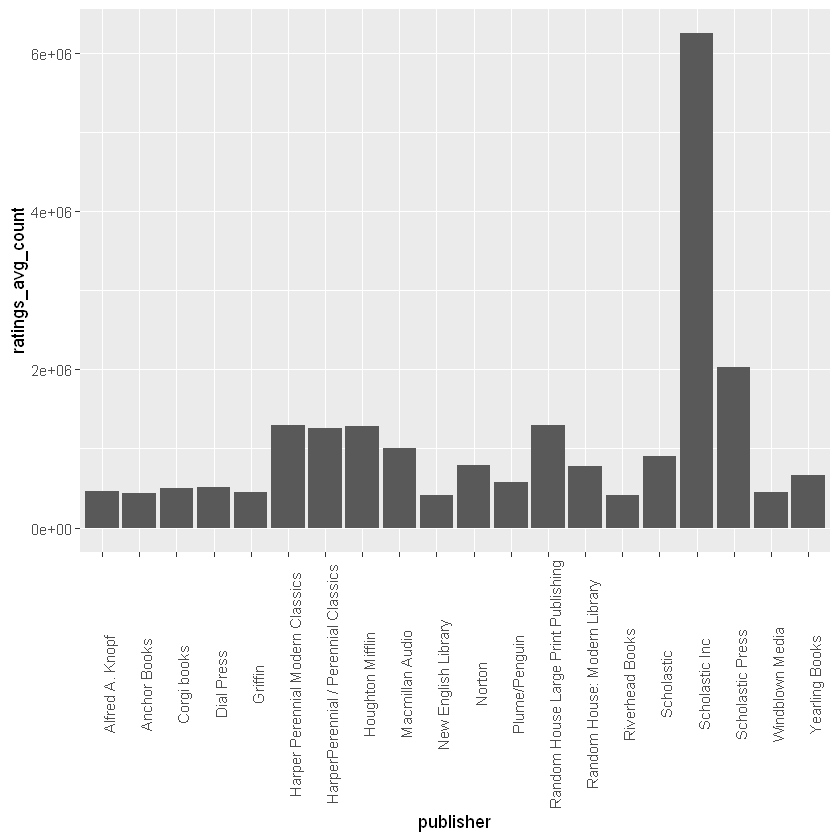

In [389]:
top20 <- publisher_count[order(-publisher_count$ratings_avg_count),][1:20,]
p <- ggplot(top20, aes(x=publisher, y=ratings_avg_count)) + geom_bar(stat="identity") + 
theme(axis.text.x = element_text(angle = 90))

p

### wnioski
Czyli znowu mamy niespójność łącznej ilości oddanych głosów z ich średnią liczbą na książkę. <br>
Jeśli chcemy przeczytać książkę z wydawnictwa o którym słyszało najwięcej osób (bo wydało najwięcej topowych książek)- wybieramy penguins, jeśli wybierając dane wydawnictwo, chcemy trafić na niesamowicie znaną książkę - wybieramy scholastic inc/press (wydało ich mniej, lecz są to najbabrdziej popularne książki) <br>
**Można sie wsm pobawić w coś stylu jakie jest prawdopodobienstwo ze wybierajac ksiazke z danego wydawnictwa  trafimy na ksiazke z popularnoscia wieksza niz srednia <br> tak de facto to do każdego pytania i porownania można to zrobić, ale idk czy to juz nie jest too much**

### 5. top 10 authors - authors vs count

In [392]:
aut_vs_count <- na.omit(data.frame(author = plik$book_author, count = plik$ratings_count))
aut_vs_count

,author,count
,<chr>,<int>
1,Stieg Larsson,2323151
2,Agatha Christie,642138
3,Dan Brown,2450604
4,Daphne du Maurier,200400
5,Truman Capote,463437
6,Mario Puzo,287416
7,Alice Sebold,1875378
8,Umberto Eco,244807
9,Robin Waterfield,544744


In [394]:
auts <- unique(aut_vs_count$author)
auts_count <- c()
auts_avg_count <- c()
i <- 1

for (at in auts) {
    auts_count[i] <- sum(aut_vs_count[aut_vs_count[,1] == at,][2])
    auts_avg_count[i] <- sum(aut_vs_count[aut_vs_count[,1] == at,][2])/sum(aut_vs_count[,1] == at)
    i <- i+1
}

author_count <- data.frame(author = auts, ratings_count = auts_count, ratings_avg_count = auts_avg_count) 

wzgledem łącznej ilosci ocen

,author,ratings_count,ratings_avg_count
,<chr>,<int>,<dbl>
1897,J.K. Rowling,6247740,6247740.0
3,Dan Brown,6033868,548533.5
649,Suzanne Collins,5867734,5867734.0
514,J.R.R. Tolkien,4724085,2362042.5
89,Harper Lee,4063329,4063329.0


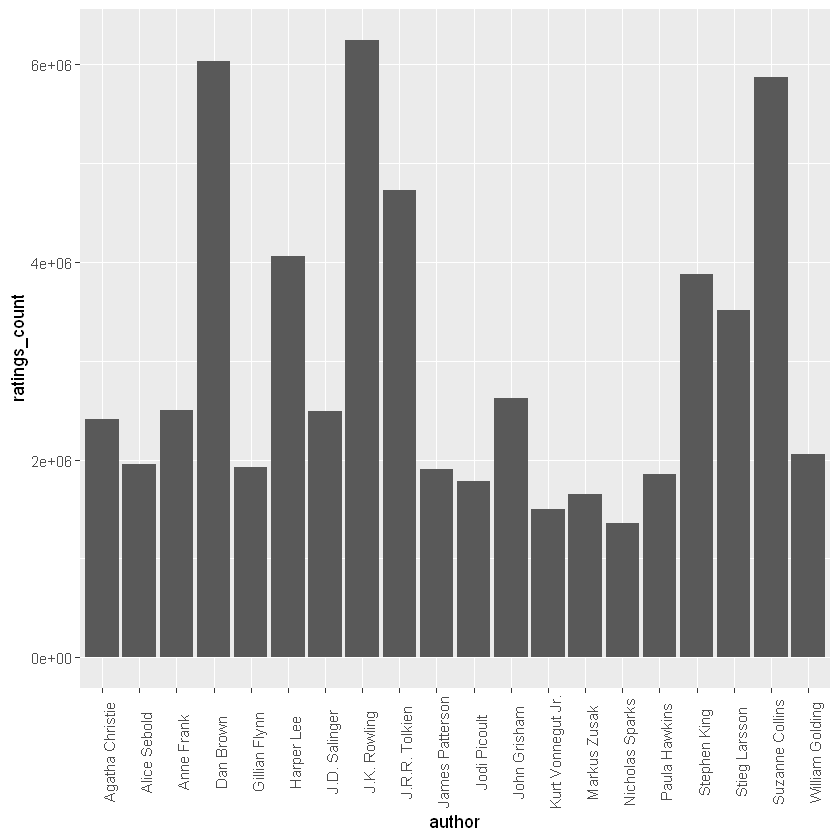

In [399]:
author_count[order(-author_count$ratings_count),][1:5,]
top20 <- author_count[order(-author_count$ratings_count),][1:20,]
p <- ggplot(top20, aes(x=author, y=ratings_count)) + geom_bar(stat="identity") + 
theme(axis.text.x = element_text(angle = 90))

p

wzgledem sredniej ilosci na ksiazke

,author,ratings_count,ratings_avg_count
,<chr>,<int>,<dbl>
1897,J.K. Rowling,6247740,6247740
649,Suzanne Collins,5867734,5867734
89,Harper Lee,4063329,4063329
2098,Anne Frank,2503131,2503131
294,J.D. Salinger,2489479,2489479


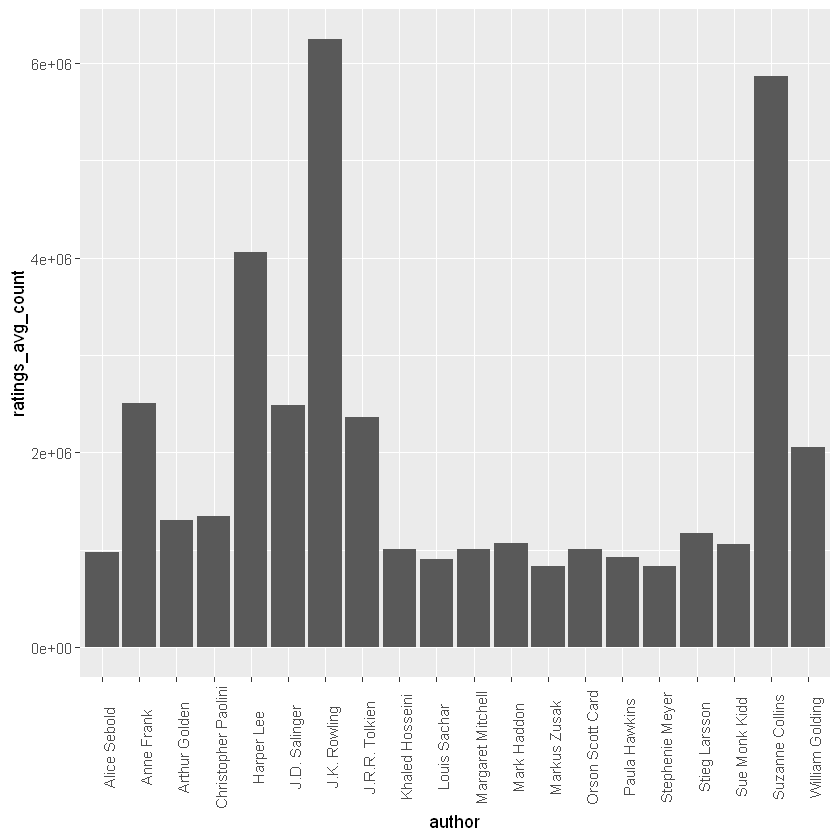

In [398]:
author_count[order(-author_count$ratings_avg_count),][1:5,]
top20 <- author_count[order(-author_count$ratings_avg_count),][1:20,]
p <- ggplot(top20, aes(x=author, y=ratings_avg_count)) + geom_bar(stat="identity") + 
theme(axis.text.x = element_text(angle = 90))

p

tym razem JK rowling (HP) jest królową pod wględem popularnosci - i tej łącznej i tej sredniej - wszystko to zasługa tego jednego hitu jaki napisała czyli Harry Potter and the Sorcerer's Stone <br>
takze suzanne colling (hunger games) się wyróżnia i jest w top 3 za kazdym razem (z tego samego powodu) i Harper Lee (To Kill a Mockingbird) <br>
są to autorzy 3 topowych tytułów, które dominują rynek pod wzgledem popularnosci <br>
w tej ekipie jedynie Dan Brown zasługuje na wyróznienie wydając 11 książek i będąc na 2 miejscu pod wzgledem łącznej ilosci ocen (więc trochę słabo względem tej  jednotytułowej śmietanki). JRR Tolkien tez ma więcej niż jeden tytuł (ale tylko 2) i znajduje się w top5

### wnioski
czyli chcąc wybrać książkę z rozważanej listy na podstawie popularności autora, warto by było przeczytać dzieła JK rowling , suzanne collins oraz Harper Lee (wybierając danych autorów można być pewnym że będzie to książka o której słyszała duża ilość osób), a także dana browna (większa ilość topowych znanych książek na jego koncie, lecz mniejsze prawdopodobienstwo że ktoś przeczytał akurat wybrany tytuł)

-------

# PODSUMOWANIE
co z tego wyszło nie wiem